Link of dataset: https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('./fashion-mnist_test.csv')
train = pd.read_csv('./fashion-mnist_train.csv')

### Q1

In [3]:
labels = [0, 1]
X_train = train[train['label'].isin(labels)].reset_index(drop=True).drop('label', axis=1)
Y_train = train['label'][train['label'].isin(labels)].reset_index(drop=True)
X_train.shape, Y_train.shape

((12000, 784), (12000,))

In [4]:
X_test = test[test['label'].isin(labels)].reset_index(drop=True).drop('label', axis=1)
Y_test = test['label'][test['label'].isin(labels)].reset_index(drop=True)
X_test.shape, Y_test.shape

((2000, 784), (2000,))

In [5]:
X_train = (np.array(X_train).T)/255.
X_test = (np.array(X_test).T)/255.
Y_train = np.array(Y_train).reshape(1, -1)
Y_test = np.array(Y_test).reshape(1, -1)
X_train.shape, X_test.shape, Y_train.shape, Y_train.shape

((784, 12000), (784, 2000), (1, 12000), (1, 12000))

In [6]:
def show_image(x):
    x = x.reshape(28, 28)
    plt.imshow(x, cmap='gray')
    plt.show

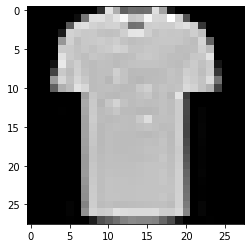

In [7]:
show_image(X_train[:, 11050])

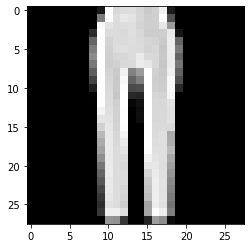

In [8]:
show_image(X_train[:, 11000])

### Q2

Step by step implementation

In [9]:
def init_params(dimension):
    w = np.zeros((dimension, 1))
    b = 0
    return w, b

In [10]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [11]:
def forward_prop(w, b, X):
    z1 = np.dot(w.T,X) + b
    prediction = sigmoid(z1)
    return z1, prediction

In [12]:
def backward_prop(X, Y, prediction):
    m = X.shape[1]
    
    cost = (-1/m) * (np.sum(np.multiply(Y, np.log(prediction)) + np.multiply((1-Y), np.log(1-prediction))))

    dw = (1/m) * (np.dot(X, (prediction - Y).T))
    db = (1/m) * (np.sum(prediction - Y))

    return dw, db, cost

In [13]:
def update_params(w, b, dw, db, lr):
    w = w - lr*dw
    b = b - lr*db
    return w, b

In [14]:
def get_accuracy(prediction, Y):
    return (100 - np.mean(np.abs(prediction - Y)) * 100)

In [15]:
def get_prediction(prediction, Y_pred):
    for i in range(Y_pred.shape[1]):
        if Y_pred[0, i] <= 0.5:
            prediction[0, i] = 0
        else:
            prediction[0, i] = 1
    
    return prediction

In [16]:
def gradient_decent(X, Y, lr, epochs):
    w, b = init_params(X.shape[0])
    for i in range(epochs):
        z, prediction = forward_prop(w, b, X)
        dw, db, cost = backward_prop(X, Y, prediction)
        w, b = update_params(w, b, dw, db, lr)

        if i % 10 == 0:
            print(f'Cost after {i} epochs: {cost}')
            print(f'Accuracy after {i} epochs: {get_accuracy(get_prediction(np.zeros((1, X.shape[1])), prediction), Y)}')
    
    return w, b
        

In [17]:
def predict(X, w, b):
    m = X.shape[1]
    prediction = np.zeros((1, m))
    z = np.dot(w.T, X) + b
    Y_pred = sigmoid(z)

    get_prediction(prediction, Y_pred)
    
    return prediction

In [18]:
def s_model(X_train, Y_train, X_test, Y_test, lr, epochs):
    w, b = gradient_decent(X_train, Y_train, lr, epochs)
    Y_pred_train = predict(X_train, w, b)
    Y_pred_test = predict(X_test, w, b)

    print(f'\nTraining accuracy: {get_accuracy(Y_pred_train, Y_train)}')
    print(f'Testing accuracy: {get_accuracy(Y_pred_test, Y_test)}')
    return Y_pred_test
    

In [19]:
Y_pred = s_model(X_train, Y_train, X_test, Y_test, 0.001, 100)

Cost after 0 epochs: 0.6931471805599452
Accuracy after 0 epochs: 50.0
Cost after 10 epochs: 0.6684914038136479
Accuracy after 10 epochs: 91.54166666666667
Cost after 20 epochs: 0.6459282519560937
Accuracy after 20 epochs: 92.61666666666666
Cost after 30 epochs: 0.6250397986018765
Accuracy after 30 epochs: 93.275
Cost after 40 epochs: 0.6055651981793925
Accuracy after 40 epochs: 93.86666666666667
Cost after 50 epochs: 0.5873304670923307
Accuracy after 50 epochs: 94.31666666666666
Cost after 60 epochs: 0.570210121327768
Accuracy after 60 epochs: 94.55
Cost after 70 epochs: 0.5541064996934573
Accuracy after 70 epochs: 94.76666666666667
Cost after 80 epochs: 0.5389386869756778
Accuracy after 80 epochs: 94.98333333333333
Cost after 90 epochs: 0.5246365743254272
Accuracy after 90 epochs: 95.11666666666667

Training accuracy: 95.24166666666667
Testing accuracy: 95.65


In [23]:
Y_pred[0, 1000]

0.0

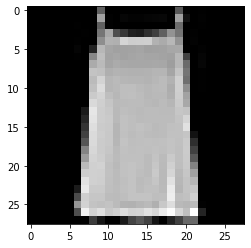

In [24]:
show_image(X_test[:, 1000])

In [25]:
Y_pred[0, 1111]

1.0

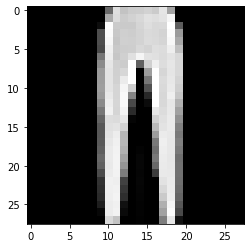

In [26]:
show_image(X_test[:, 1111])

In [27]:
Y_pred[0, 100]

1.0

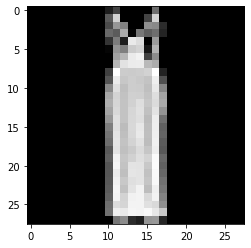

In [28]:
show_image(X_test[:, 100])

Using tensorflow and no hidden layer

In [29]:
import tensorflow as tf

In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [32]:
model.fit(X_train.T, Y_train.T, epochs=100)

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 0.4247 - accuracy: 0.9118
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.2637 - accuracy: 0.9543
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2115 - accuracy: 0.9567
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1848 - accuracy: 0.9584
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1679 - accuracy: 0.9594
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1560 - accuracy: 0.9617
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1470 - accuracy: 0.9622
Epoch 8/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1397 - accuracy: 0.9632
Epoch 9/100
375/375 [==============================] - 1s 1ms/step - loss: 0.1337 - accuracy: 0.9643
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 0.1286 - accura

In [33]:
tf_pred = model.predict(X_test.T)


63/63 [==============================] - 0s 1ms/step


In [34]:
tf_pred = get_prediction(np.zeros((1, Y_test.shape[1])),tf_pred.T)

In [35]:
print(f'Accuracy of tensorflow model: {get_accuracy(tf_pred, Y_test)}')

Accuracy of tensorflow model: 98.15


In [36]:
tf_pred[0, 1234]

0.0

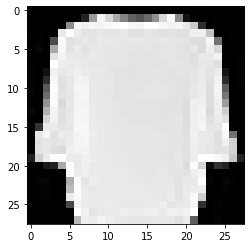

In [37]:
show_image(X_test[:, 1234])

In [38]:
tf_pred[0, 1589]

1.0

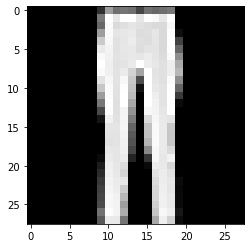

In [39]:
show_image(X_test[:, 1589])

In [40]:
tf_pred[0, 100]

1.0

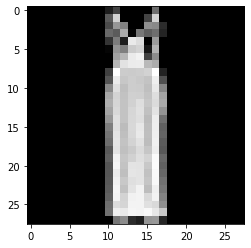

In [41]:
show_image(X_test[:, 100])


### Q3

In [42]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(100, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [43]:
model2.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

In [44]:
model2.fit(X_train.T, Y_train.T, epochs=100)

Epoch 1/100
375/375 [==============================] - 2s 2ms/step - loss: 0.7063 - accuracy: 0.5238
Epoch 2/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6777 - accuracy: 0.7761
Epoch 3/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6706 - accuracy: 0.8269
Epoch 4/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6633 - accuracy: 0.8553
Epoch 5/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6558 - accuracy: 0.8700
Epoch 6/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6478 - accuracy: 0.8847
Epoch 7/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6394 - accuracy: 0.8960
Epoch 8/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6304 - accuracy: 0.9013
Epoch 9/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6206 - accuracy: 0.9060
Epoch 10/100
375/375 [==============================] - 1s 2ms/step - loss: 0.6103 - accura

In [45]:
tf_pred2 = model2.predict(X_test.T)

63/63 [==============================] - 0s 2ms/step


In [46]:
tf_pred2 = get_prediction(np.zeros((1, Y_test.shape[1])), tf_pred2.T)

In [47]:
tf_pred2[0, 1789]

1.0

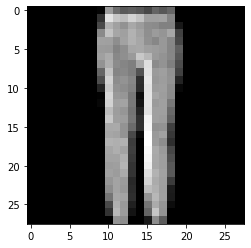

In [48]:
show_image(X_test[:, 1789])

In [49]:
tf_pred2[0, 1567]

0.0

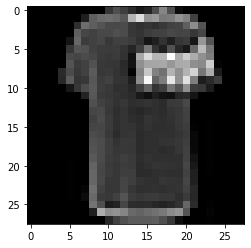

In [50]:
show_image(X_test[:, 1567])

In [51]:
tf_pred2[0, 100]

1.0

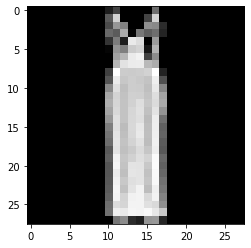

In [52]:
show_image(X_test[:, 100])